# ANN for Readiness Indonesian Red Cross Society:

### Develop a deep learning model, predict the final readiness value in advance, up to 10 days after the start of a humanitarian crisis:
1. Information you can use: the policies, total demand, initial inventory, and the first 10 days demand cov- erage curve
2. Expected prediction: the readiness.

## Import libraries

In [1]:
# import the necessary libraries
import warnings

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# suppress all warnings
warnings.filterwarnings("ignore")

## Build the data pipeline

In [3]:
#data = pd.read_csv('red_cross_supply_chain_dataset.csv', encoding='utf-8', sep=',', na_values=['NA', 'missing'])

In [4]:
# Dataset
data = 'https://raw.githubusercontent.com/Jhonnatan7br/ML-Project--Humanitarian-supply-chain-network---Indonesian-Red-Cross-Society-/main/Data/red_cross_supply_chain_dataset.csv'
data = pd.read_csv(data,  sep=",")

"""Explore the DataFrame to get an understanding of the data:"""
#Display all the DataSet (It cant show all because it is too large)
data.head(20)

,Sourcing,Transport,Replenishment,Distribution,Total demand,Initial RW Inv,Initial PW Inv,Initial DW Inv Total,Initial DW Inv 0,Initial DW Inv 1,...,Demand coverage after 480 hours (%),Demand coverage after 492 hours (%),Demand coverage after 504 hours (%),Demand coverage after 516 hours (%),Demand coverage after 528 hours (%),Demand coverage after 540 hours (%),Demand coverage after 552 hours (%),Demand coverage after 564 hours (%),Demand coverage after 576 hours (%),Readiness (%)
0,0,0,1,0,17497.0,2724.0,156.0,120.0,1.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.505439
1,0,0,1,0,20365.0,2237.0,431.0,332.0,32.0,2.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.125215
2,0,0,1,0,23393.0,2332.0,377.0,291.0,7.0,1.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.340390
3,0,0,1,0,25825.0,2167.0,252.0,581.0,7.0,31.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.935140
4,0,0,1,0,23179.0,2357.0,91.0,552.0,7.0,7.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.258119
5,0,0,1,0,23422.0,2295.0,434.0,271.0,95.0,9.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.169977
6,0,0,1,0,18156.0,2271.0,368.0,361.0,2.0,5.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,73.988155
7,0,0,1,0,21953.0,2562.0,164.0,274.0,5.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,73.781907
8,0,0,1,0,19621.0,2506.0,112.0,382.0,18.0,11.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,74.734978
9,0,0,1,0,25115.0,2498.0,368.0,134.0,14.0,13.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,73.809424


In [5]:
data.drop(['Demand coverage after 252 hours (%)',
 'Demand coverage after 264 hours (%)',
 'Demand coverage after 276 hours (%)',
 'Demand coverage after 288 hours (%)',
 'Demand coverage after 300 hours (%)',
 'Demand coverage after 312 hours (%)',
 'Demand coverage after 324 hours (%)',
 'Demand coverage after 336 hours (%)',
 'Demand coverage after 348 hours (%)',
 'Demand coverage after 360 hours (%)',
 'Demand coverage after 372 hours (%)',
 'Demand coverage after 384 hours (%)',
 'Demand coverage after 396 hours (%)',
 'Demand coverage after 408 hours (%)',
 'Demand coverage after 420 hours (%)',
 'Demand coverage after 432 hours (%)',
 'Demand coverage after 444 hours (%)',
 'Demand coverage after 456 hours (%)',
 'Demand coverage after 468 hours (%)',
 'Demand coverage after 480 hours (%)',
 'Demand coverage after 492 hours (%)',
 'Demand coverage after 504 hours (%)',
 'Demand coverage after 516 hours (%)',
 'Demand coverage after 528 hours (%)',
 'Demand coverage after 540 hours (%)',
 'Demand coverage after 552 hours (%)',
 'Demand coverage after 564 hours (%)',
 'Demand coverage after 576 hours (%)'], axis=1, inplace=True)

In [6]:
X = data.drop('Readiness (%)', axis=1) # Features
y = data['Readiness (%)'].values # Target
print(X)
print(y)

       Sourcing  Transport  Replenishment  Distribution  Total demand  \
0             0          0              1             0       17497.0   
1             0          0              1             0       20365.0   
2             0          0              1             0       23393.0   
3             0          0              1             0       25825.0   
4             0          0              1             0       23179.0   
...         ...        ...            ...           ...           ...   
11995         1          1              0             1       22100.0   
11996         1          1              0             1       19185.0   
11997         1          1              0             1       21936.0   
11998         1          1              0             1       31348.0   
11999         1          1              0             1       14102.0   

       Initial RW Inv  Initial PW Inv  Initial DW Inv Total  Initial DW Inv 0  \
0              2724.0           156.0     

In [7]:
# scale numerical features with MinMaxScaler
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(X)

In [8]:
# train test split
train_X, test_X, train_y, test_y = train_test_split(
    scaled_feature,
    y,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

In [9]:
# specify the type of data stored in the tensors to avoid incompatiblity
train_ds = TensorDataset(
    torch.tensor(train_X, dtype = torch.float32),
    torch.tensor(train_y, dtype = torch.float32)
)
test_ds = TensorDataset(
    torch.tensor(test_X, dtype = torch.float32),
    torch.tensor(test_y, dtype = torch.float32)
)

In [10]:
# create the train and test data loaders
batch_size = 16
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
test_dl = DataLoader(test_ds, batch_size = batch_size, shuffle = False)

In [11]:
# get a minibatch from the data loader and print shape of feature and label
for (X, y) in train_dl:
    print(X.shape)
    print(y.shape)
    break

torch.Size([16, 44])
torch.Size([16])


 ## Create a non-linear multi-layer ANN

In [12]:
# define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, n_features, n_labels):
        super().__init__()
        self.net = nn.Linear(n_features, n_labels)
    def forward(self, X):
        return self.net(X)

In [13]:
# create the neural network
model = NeuralNetwork(
    n_features = X.shape[1],
    n_labels = 1
)

In [14]:
# print network structure and learning parameters
print(f"Model structure:\n{model}\n")
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()}")

Model structure:
NeuralNetwork(
  (net): Linear(in_features=44, out_features=1, bias=True)
)

Layer: net.weight | Size: torch.Size([1, 44])
Layer: net.bias | Size: torch.Size([1])


## Train the ANN

In [15]:
# define the training function
def train(dataloader, model, loss_fn, optimizer, epochs):
    batch_loss_history = [] # for recording the average loss of a batch
    epoch_loss_history = [] # for recording the average loss of an epoch
    model.train() # set the model in training mode
    for epoch in range(epochs): # iterate pre-defined number of epoches
        epoch_loss = 0.0 # initial epoch loss is set to zero
        for (X, y) in dataloader: # get a batch of training samples
            pred = model(X).squeeze() # make predictions, squeeze() reduce `pred` to 1D tensor
            batch_loss = loss_fn(pred, y) # compute the current batch loss
            batch_loss.backward() # compute gradients by backpropagation
            optimizer.step() # update learning parameters according to gradients
            optimizer.zero_grad() # reset the gradients to zero
            batch_loss_history.append(batch_loss.item()) # record current batch loss
            epoch_loss += batch_loss.item() # accumulate batch losses for compute epoch loss
        epoch_loss /= len(dataloader) # compute current epoch loss
        epoch_loss_history.append(epoch_loss) # record current epoch loss
        print(f"Epoch {epoch + 1}: train loss = {epoch_loss}") # print log
    return batch_loss_history, epoch_loss_history

In [16]:
# define the training hyper-parameters
loss_fn = nn.MSELoss()
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
epochs = 1000

In [17]:
# train the neural network
batch_loss_history, epoch_loss_history = train(train_dl, model, loss_fn, optimizer, epochs)

Epoch 1: train loss = 113.76116047314235
Epoch 2: train loss = 23.15887135460263
Epoch 3: train loss = 20.661109029224942
Epoch 4: train loss = 19.520795612789335
Epoch 5: train loss = 18.844315475282215
Epoch 6: train loss = 18.481489632016135
Epoch 7: train loss = 18.22098029454549
Epoch 8: train loss = 18.047529050736202
Epoch 9: train loss = 17.926634101413544
Epoch 10: train loss = 17.845028643381028
Epoch 11: train loss = 17.785831041108995
Epoch 12: train loss = 17.727228862671627
Epoch 13: train loss = 17.66080312047686
Epoch 14: train loss = 17.656741356168475
Epoch 15: train loss = 17.625293499628704
Epoch 16: train loss = 17.60641434260777
Epoch 17: train loss = 17.585188825243996
Epoch 18: train loss = 17.564946843101865
Epoch 19: train loss = 17.54797261873881
Epoch 20: train loss = 17.551457050868443
Epoch 21: train loss = 17.52569596926371
Epoch 22: train loss = 17.517082169850667
Epoch 23: train loss = 17.517692955562048
Epoch 24: train loss = 17.509882960546584
Epoch 2

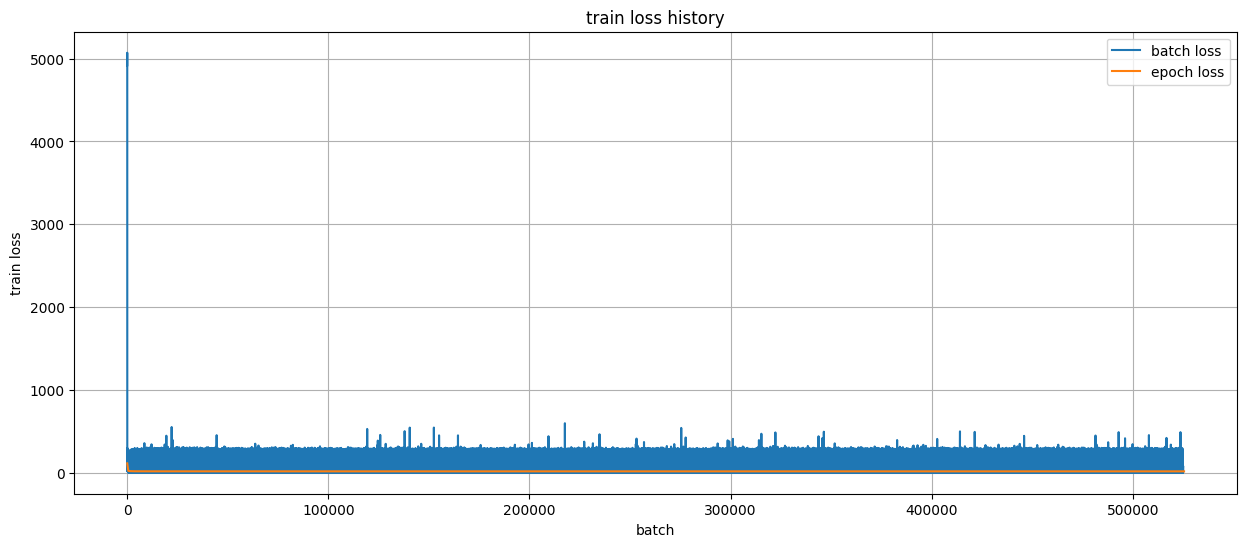

In [39]:
# plot the train loss history
plt.figure(figsize=(15, 6))
batch = np.arange(len(batch_loss_history))
epoch = np.arange(len(epoch_loss_history))
batches_per_epoch = (int(len(train_X) / batch_size + 1))
plt.plot(batch, batch_loss_history, '-', label = 'batch loss')
plt.plot(epoch * batches_per_epoch, epoch_loss_history, '-', label = 'epoch loss')
plt.title('train loss history')
plt.xlabel('batch')
plt.ylabel('train loss')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# save model
file_name = 'red_cross_supply_chain_model.pth'
torch.save(model.state_dict(), file_name)
print('Saved PyTorch Model State to '+ file_name)


Saved PyTorch Model State to red_cross_supply_chain_model.pth


In [20]:
model = NeuralNetwork(
    n_features = X.shape[1],
    n_labels = 1
)
model.load_state_dict(torch.load(file_name))

<All keys matched successfully>

In [21]:
# define a function to make predictions on test dataset and evaluate the performance
def test(dataloader, model, loss_fn):
    batch_pred_list = [] # for recording batch predictions
    model.eval() # set the model in evaluation mode
    with torch.no_grad(): # disable automatic gradient computing
        loss = 0.0 # set initial test loss to zero
        for (X, y) in dataloader: # get a batch from test samples
            batch_pred = model(X).squeeze() # make predictions, squeeze() reduce `batch_pred` to 1D tensor
            batch_loss = loss_fn(batch_pred, y) # compute current batch loss
            loss += batch_loss.item() # accumulate batch losses for compute test loss
            batch_pred_list.append(batch_pred) # record predictions on current batch
        loss /= len(dataloader) # compute test loss
        pred = np.concatenate(batch_pred_list) # reform the predictions as a numpy 1D array
        print(f"test loss = {loss}") # print log
    return pred, loss

In [22]:
# make prediction on test set and evaluate the performance
test_pred, test_loss = test(test_dl, model, loss_fn)
# model performance on the testing dataset
rmse_test = mean_squared_error(test_y, test_pred, squared = False)
r2_test = r2_score(test_y, test_pred)
# print RMSE and r2 score
print("RMSE test:", rmse_test)
print("R2 test:", r2_test)

test loss = 16.082185881932578
RMSE test: 4.0102601454348585
R2 test: 0.9057550163622177


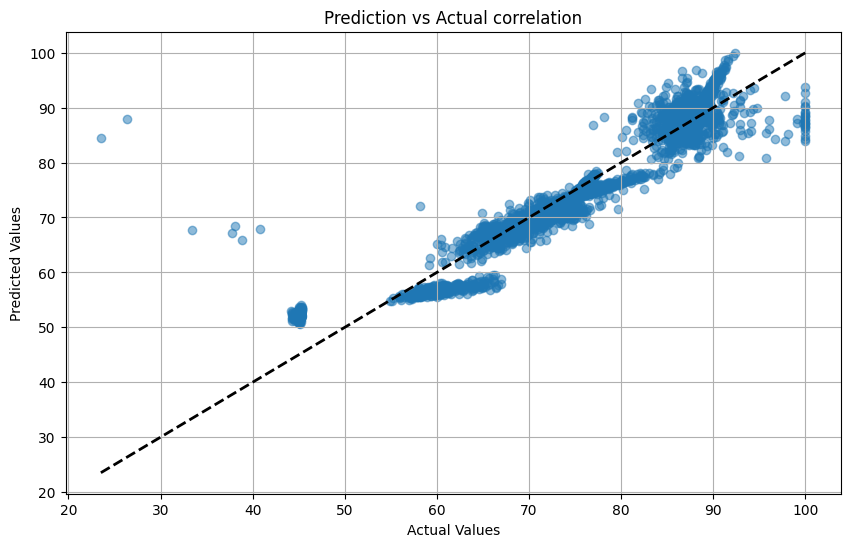

In [28]:
# plot the prediction results of the test dataset

# Scatter plot to show the correlation between predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(test_y, test_pred, alpha=0.5)
plt.title('Prediction vs Actual correlation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Line for perfect predictions
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2)

plt.show()

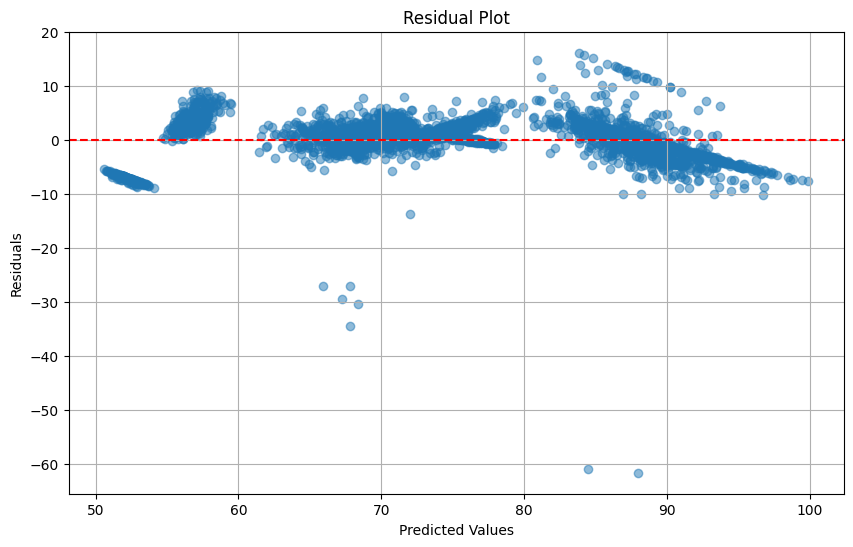

In [27]:
# Calculate residuals
residuals = test_y - test_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(test_pred, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Line at 0 to show where residuals would be zero
plt.grid(True)
plt.show()


In [31]:
def predict_random_samples(dataloader, model, num_samples=5):
    model.eval()  # Set the model to evaluation mode
    all_preds, all_actuals = [], []

    with torch.no_grad():
        for X, y in dataloader:
            preds = model(X).squeeze().numpy()  # Predict and convert to numpy array
            actuals = y.numpy()  # Convert actual values to numpy array
            all_preds.extend(preds)
            all_actuals.extend(actuals)

    # Select random indices
    indices = np.random.choice(len(all_preds), num_samples, replace=False)

    # Select random predictions and actuals based on the indices
    random_preds = [all_preds[idx] for idx in indices]
    random_actuals = [all_actuals[idx] for idx in indices]

    return random_preds, random_actuals

# Use the function
random_predictions, random_actuals = predict_random_samples(test_dl, model, num_samples=20)


In [41]:
# Create a DataFrame with some predictions
df = pd.DataFrame({
    'Actual Values': random_actuals,
    'Predicted Values': random_predictions
})

df

,Actual Values,Predicted Values
0,45.013889,51.993450
1,63.191502,66.126541
2,45.009842,52.659565
3,60.593330,58.070950
4,88.736115,90.328918
5,68.996429,69.759872
6,74.128105,71.221512
7,70.960327,69.623466
8,88.688583,91.131546
9,95.678719,85.459427


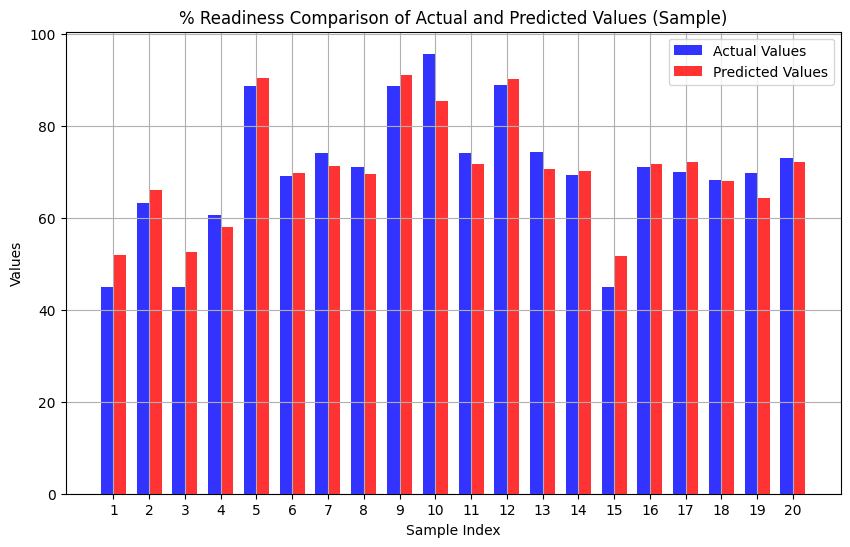

In [43]:

df = pd.DataFrame({
    'Actual Values': random_actuals,
    'Predicted Values': random_predictions
})

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(df))

bar1 = ax.bar(index, df['Actual Values'], bar_width, label='Actual Values', alpha=0.8, color='b')
bar2 = ax.bar(index + bar_width, df['Predicted Values'], bar_width, label='Predicted Values', alpha=0.8, color='r')

ax.set_xlabel('Sample Index')
ax.set_ylabel('Values')
ax.set_title('% Readiness Comparison of Actual and Predicted Values (Sample)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(range(1, len(df) + 1))
ax.legend()

plt.grid(True)
plt.show()
